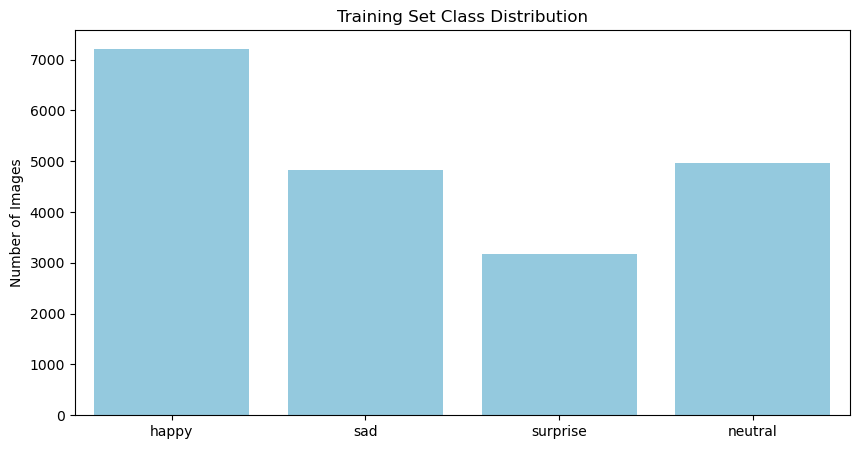

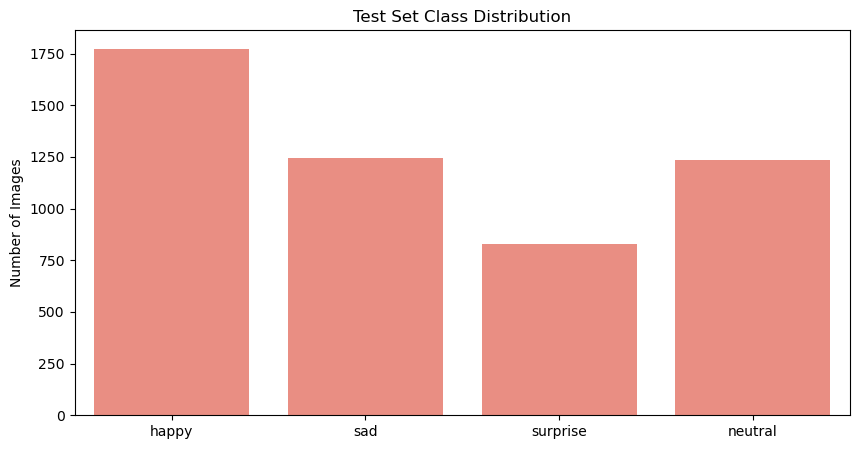

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import random
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define paths for each target class within training and testing directories
train_dir = r"train_path"
test_dir = r"test_path"
target_classes = ['happy', 'sad', 'surprise', 'neutral']

# A function to get the count of images in each class directory
def get_class_distribution(directory):
    distribution = {}
    for class_name in target_classes:
        class_path = os.path.join(directory, class_name)
        distribution[class_name] = len(os.listdir(class_path))
    return distribution

# 1. Display class distribution
train_distribution = get_class_distribution(train_dir)
test_distribution = get_class_distribution(test_dir)

# Plot distribution
plt.figure(figsize=(10, 5))
sns.barplot(x=list(train_distribution.keys()), y=list(train_distribution.values()), color="skyblue")
plt.title("Training Set Class Distribution")
plt.ylabel("Number of Images")
plt.show()

plt.figure(figsize=(10, 5))
sns.barplot(x=list(test_distribution.keys()), y=list(test_distribution.values()), color="salmon")
plt.title("Test Set Class Distribution")
plt.ylabel("Number of Images")
plt.show()

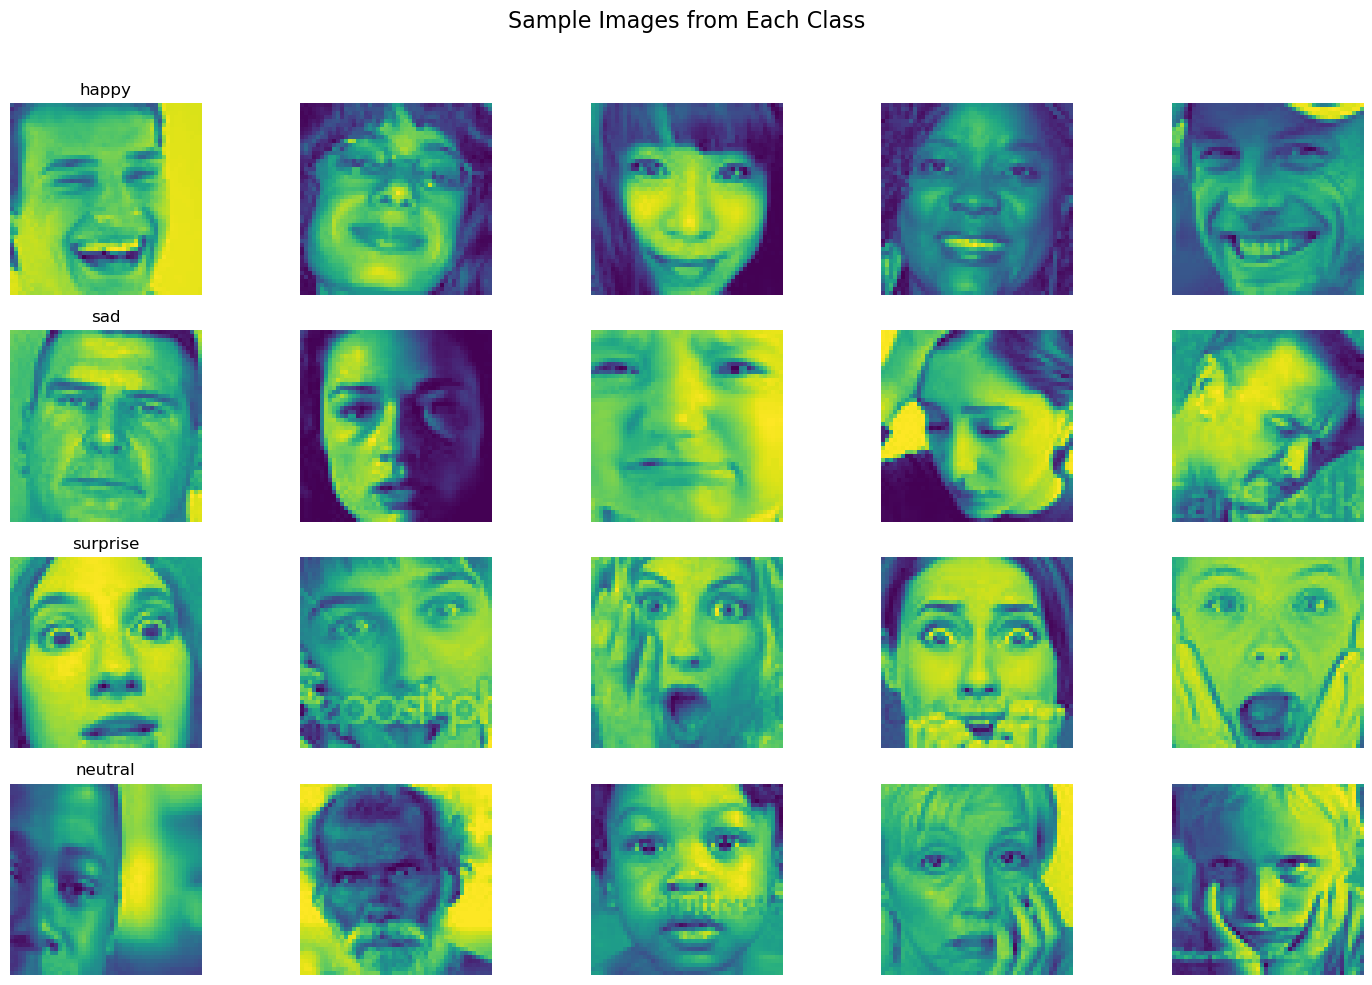

In [2]:
# 2. Display sample images from each class
def display_samples(directory, class_names, num_samples=5):
    fig, axes = plt.subplots(len(class_names), num_samples, figsize=(15, 10))
    fig.suptitle("Sample Images from Each Class", fontsize=16)
    
    for i, class_name in enumerate(class_names):
        class_path = os.path.join(directory, class_name)
        # Get all image files and shuffle them
        all_files = os.listdir(class_path)
        random.shuffle(all_files)
        sample_files = all_files[:num_samples]
        for j, file_name in enumerate(sample_files):
            img = plt.imread(os.path.join(class_path, file_name))
            axes[i, j].imshow(img)
            axes[i, j].axis('off')
            if j == 0:
                axes[i, j].set_title(class_name, fontsize=12)
    
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

# Display sample images from the training set
display_samples(train_dir, target_classes)

In [3]:
# 3. Image dimensions
sample_img = plt.imread(os.path.join(train_dir, target_classes[0], os.listdir(os.path.join(train_dir, target_classes[0]))[0]))
print(f"Sample Image Dimensions: {sample_img.shape}")

Sample Image Dimensions: (48, 48)


Found 20181 images belonging to 4 classes.


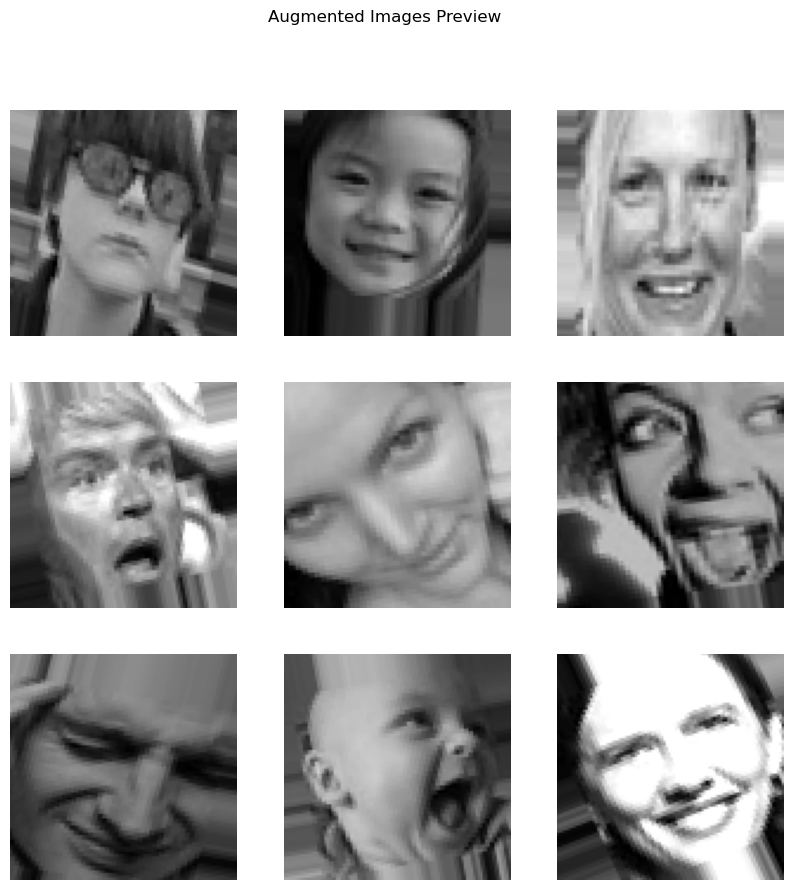

In [4]:
# 4. Preview augmented images
# Create ImageDataGenerator with augmentations
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=25,        # Randomly rotate images in the range (degrees)
    height_shift_range=0.1,   # Randomly translate images vertically
    width_shift_range=0.1,    # Randomly translate images horizontally
    shear_range=0.2,          # Randomly shear images
    zoom_range=0.2,           # Randomly zoom in and out on images
    horizontal_flip=True,     # Randomly flip images horizontally
    brightness_range=[0.6, 1.4] # Randomly change brightness range
)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(96, 96),
    color_mode='rgb',
    batch_size=9,
    class_mode='categorical',
    classes=target_classes,
    shuffle=True
)

# Plot a batch of augmented images
augmented_images, _ = next(train_generator)
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[i])
    plt.axis('off')
plt.suptitle("Augmented Images Preview")
plt.show()